Kütüphanelerin import edilmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("sample_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data 7 columns and 1338 rows'dan olusuyor. Data'da Null values bulunmuyor. Data type'larında herhangi bir sorun yok 

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Bmi, children, charges columns'da %75'ten %100'e fazla bir artis var ve outlier value olabilir.  

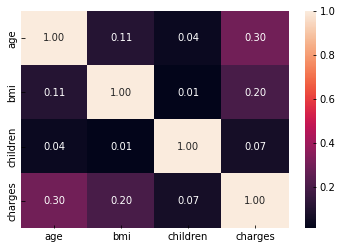

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Charges-Age arasında pozitif yonlu bir iliski %30 oranında vardır.

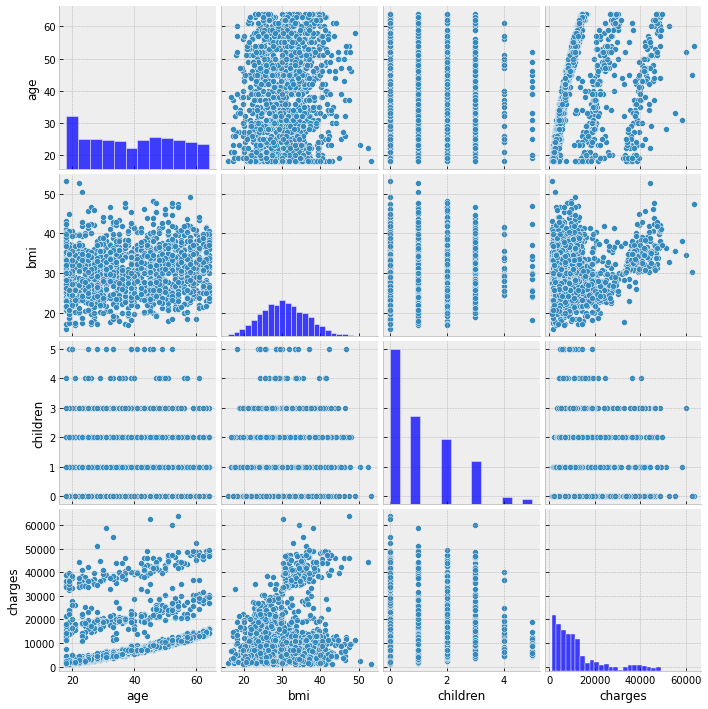

In [ ]:
sns.pairplot(df)
plt.show()

Outlier values oldugunu pairplot uzerinde de gorebiliyoruz.

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() > 15]
num_but_cat = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() <= 15]
cat_but_num = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() > 15]
cat_cols = [col for col in df.columns if df[col].nunique() <= 15]
print("Numeric columns: {}\nCategoric Columns: {}\nCategoric but Numeric Columns: {}".format(num_cols,cat_cols,cat_but_num))

Numeric columns: ['age', 'bmi', 'charges']
Categoric Columns: ['sex', 'children', 'smoker', 'region']
Categoric but Numeric Columns: []


Columns numeric, categoric and numeric_but_categoric olarak ayrıldı. Zaten 3.seçenek olmadığından dolayı numeric and categoric olarak ayrılmış oldu.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'bmi-charges')

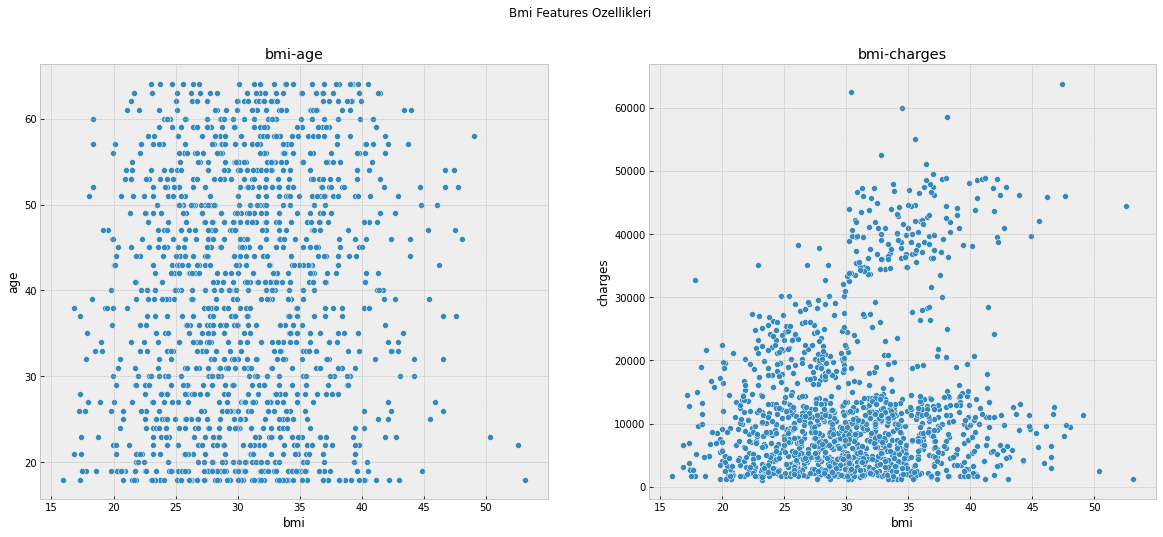

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize= (20,8))
fig.suptitle("Bmi Features Ozellikleri")
sns.scatterplot(df["bmi"], df["age"],ax = axes[0])
axes[0].set_title("bmi-age")
sns.scatterplot(df["bmi"], df["charges"], ax = axes[1])
axes[1].set_title("bmi-charges")

bmi-charges arasında lineer(dogrusal) bir iliski vardır

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


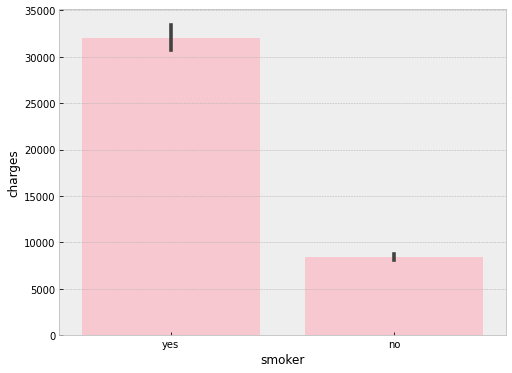

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(df["smoker"], df["charges"], color="pink")
plt.show()

Sigara icen kisi sayisinin daha fazla oldugunu goruyoruz

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


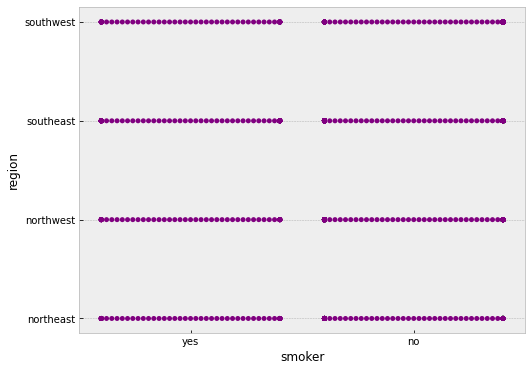

In [ ]:
plt.figure(figsize=(8,6))
sns.swarmplot(df["smoker"], df["region"], color="purple")
plt.show()

smoker and region arasında orantılı bir iliski var

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


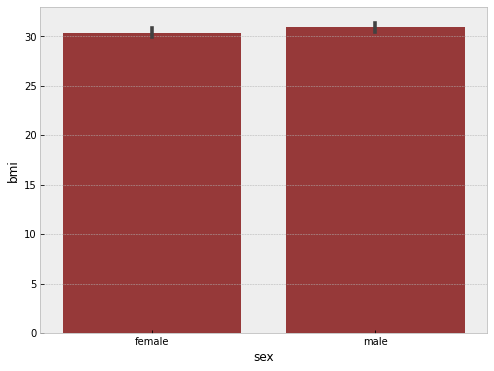

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(df["sex"], df["bmi"], color="brown")
plt.show()

Kadınlara oranla erkeklerde bmi(vücut kitle indeks)'i daha fazladır

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


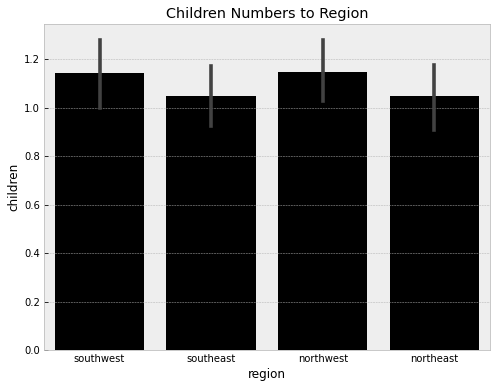

,age,sex,bmi,children,smoker,charges
region,,,,,,
southeast,364,364,364,364,364,364
northwest,325,325,325,325,325,325
southwest,325,325,325,325,325,325
northeast,324,324,324,324,324,324


In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(df["region"], df["children"], color="black")
plt.title("Children Numbers to Region")
plt.show()

df.groupby("region").agg("count").sort_values("children",ascending=False) 

Bu sonuclara gore en fazla çocuk sayısına sahip olan region southeast'dir.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


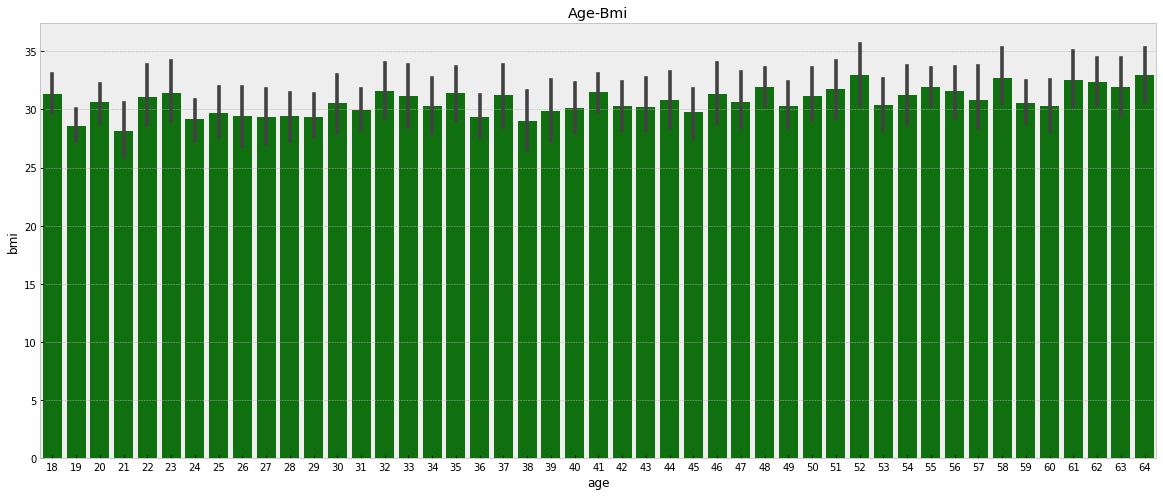

age,64,52,58,61,62,55,48,63,51,56,...,25,28,26,29,36,27,24,38,19,21
bmi,32.976136,32.936034,32.7182,32.548261,32.342609,31.95,31.92569,31.923478,31.727069,31.600962,...,29.693929,29.482143,29.428929,29.383148,29.3742,29.333571,29.142679,28.9966,28.596912,28.185714


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(df["age"], df["bmi"], color="green")
plt.title("Age-Bmi")
plt.show()

df.groupby(["age"]).agg({"bmi":"mean"}).sort_values("bmi",ascending=False).T

Yasi 30'dan buyuk olanlarin **mean** olarak vucut kitle indeksi 30'dan fazladir.

Mean olarak *italik metin*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


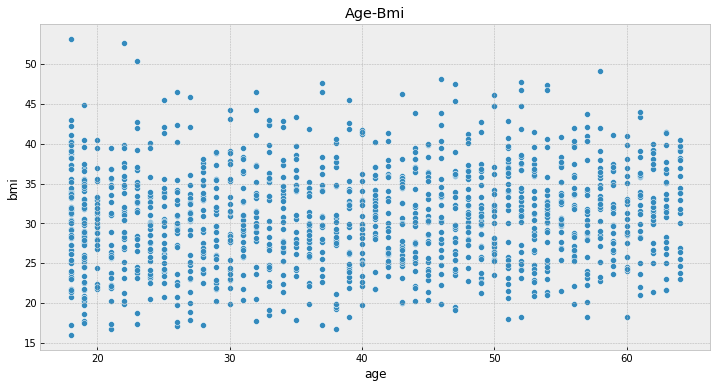

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(12,6))
sns.scatterplot(df["age"], df["bmi"])
plt.title("Age-Bmi")
plt.show()

Bu grafikten Age-Bmi arasındaki iliski orantili olarak gozukuyor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


False
age  :  (-9.0, 87.0)


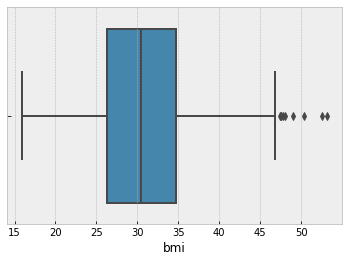

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
True
bmi  :  (13.7, 47.290000000000006)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


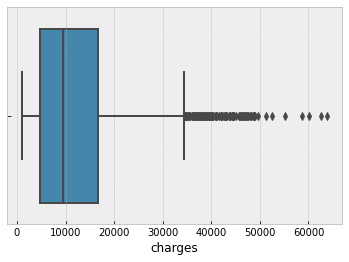

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
True
charges  :  (-13109.1508975, 34489.350562499996)


In [ ]:
def outlierThreshold(df,col,q1,q3):
   Q1 = df[col].quantile(q1)
   Q3 = df[col].quantile(q3)
   iqr = Q3 - Q1 
   lowerLimit = Q1 - iqr * 1.5
   upperLimit = Q3 + iqr * 1.5
   return lowerLimit, upperLimit
def outlierResult(df,col,q1,q3):
  lowerLimit, upperLimit = outlierThreshold(df,col,q1,q3)
  outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
  if outlierDf.any(axis=None):
     sns.boxplot(df[col])
     plt.show()
     print(df[col].describe().T)
     return True
  else: 
     return False
for col in num_cols:
   print(outlierResult(df,col, q1 = 0.25, q3 = 0.75))
   print(col," : ",outlierThreshold(df,col, q1 = 0.25, q3 = 0.75))


Buradan çıkarttığımız sonuçlara göre **bmi** ve **charges** kolonunda outlier degerler oldugunu goruyoruz. Bu outlier degerleri boxplot haricinde describe ile de gorebiliyoruz. Çünkü age kolonunda %75'ten %100'e bir sıçrama yaşanmış. Aynı şekilde charges kolonuna baktığımız zaman da mean: 13270 iken %50 quantile 9382 olduğundan veya %75-%100 arası sıçrama olduğundan outlier value vardır diyebiliriz.

Bu outlier degerleri data üzerinden atmamız gerekecek çünkü machine learning algoritmaları outlier degerleri yanlis algılayıp sonucları yanlıs tahmin edebilir.

In [ ]:
df.shape


(1338, 7)

In [ ]:
for col in num_cols: 
   lowerLimit, upperLimit = outlierThreshold(df,col,q1 = 0.25,q3 = 0.75)
   df = df.loc[(df[col] > lowerLimit) & (df[col] < upperLimit)]
df.shape

(1191, 7)

False
age  :  (-11.5, 88.5)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


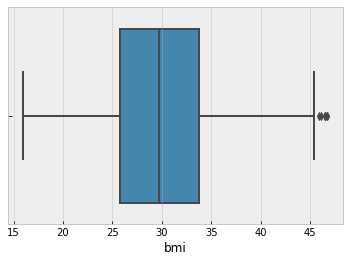

count    1191.000000
mean       29.993648
std         5.870584
min        15.960000
25%        25.800000
50%        29.700000
75%        33.770000
max        46.750000
Name: bmi, dtype: float64
True
bmi  :  (13.844999999999997, 45.72500000000001)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


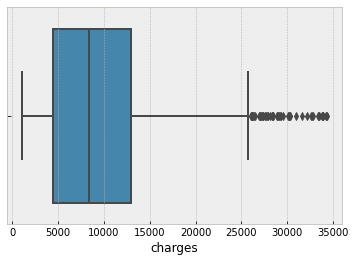

count     1191.000000
mean      9901.104142
std       7187.379901
min       1121.873900
25%       4408.695900
50%       8347.164300
75%      12953.594600
max      34303.167200
Name: charges, dtype: float64
True
charges  :  (-8408.65215, 25770.94265)


In [ ]:
for col in num_cols:
   print(outlierResult(df,col, q1 = 0.25, q3 = 0.75))
   print(col," : ",outlierThreshold(df,col, q1 = 0.25, q3 = 0.75))

Halaa charges kolonunda outlier degerler var ama biz bu degerleri atarsak data sayısı fazla olmadıgından dolayı train sayısı azalacak ve model iyi ogrenemeyecek. Bu nedenle 

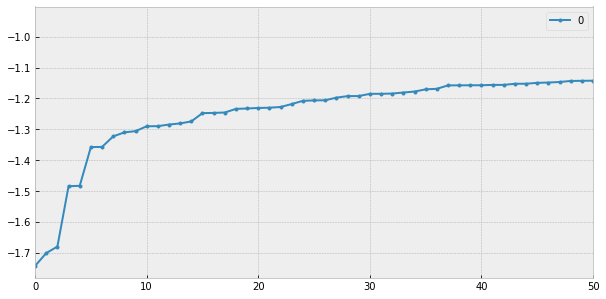

Result: [-1.74341451 -1.70172607 -1.68057819 -1.48488453 -1.48361178 -1.35799844
 -1.35747941 -1.32336258 -1.31026761 -1.30642956 -1.29051604 -1.29016486
 -1.28487156 -1.28125099 -1.27479761 -1.2478896  -1.2472272  -1.24586186
 -1.23414953 -1.23285196 -1.23116925 -1.23031252 -1.22798809 -1.21836986
 -1.20801164 -1.2065985  -1.20620929 -1.19765357 -1.19272738 -1.19256419
 -1.1853213  -1.18525116 -1.18441548 -1.18106734 -1.17796425 -1.17070376
 -1.16908389 -1.15791928 -1.1577784  -1.1575322  -1.15746335 -1.15642372
 -1.15629653 -1.15275051 -1.15256445 -1.14970308 -1.14868186 -1.14692032
 -1.14357217 -1.14315639]
DataFrame Scores: [-0.94614334 -1.00284642 -0.94942558 ... -1.00055809 -1.02382177
 -1.06515089]


In [ ]:
from PIL.Image import NONE
from sklearn.neighbors import LocalOutlierFactor
def localOutlierFactor(df,neighbors = None, percent = NONE, plot_xlim = None):
  for col in df.columns:
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination = percent)
    lof.fit_predict(df)
    df_scores = lof.negative_outlier_factor_
    plt.style.use("bmh")
    pd.DataFrame(np.sort(df_scores)).plot(stacked = True, xlim = [0, plot_xlim], style = ".-", figsize=(10,5))
    plt.show()
    result = np.sort(df_scores)[0:plot_xlim]   # en kotu plot_xlim sayıda gozlemin skoru
    return result, df_scores
#for col in num_cols:
 #  result, df_scores = localOutlierFactor(df,col, neighbors = 20, percent = 0.1, plot_xlim = 50)
  # print("Result: {}\nDf_Scores: {}".format(result,df_scores))
result, df_scores = localOutlierFactor(df.drop(cat_cols, axis=1), neighbors = 20, percent = 0.1, plot_xlim = 50)
print("Result: {}\nDataFrame Scores: {}".format(result,df_scores))

Local Outlier Factor aykırı eşik değer olarak belirlenmiş bir noktanın(Bu verisetindeki nokta 13 diyebiliriz.) diger komsularına gore aykırı deger olarak kabul edilmesidir. Çevresindeki verilerin yoğunlugunu gozlemleyerek bir aykırı deger belirler. 

In [ ]:
df = df.drop(df[df_scores <  -1.30642956].index, axis = 0).reset_index(drop=True) # -1.5140684 altında ise bu verileri at diyoruz
print(df.shape)

(1141, 7)


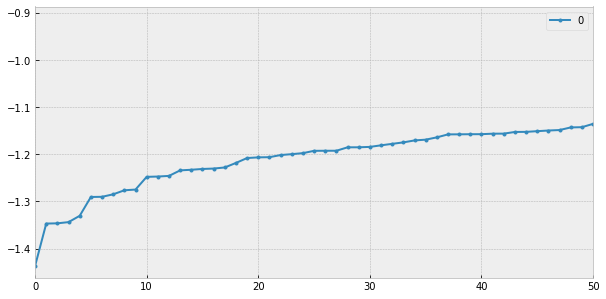

Result: [-1.43665378 -1.34687128 -1.34636384 -1.34378878 -1.33040263 -1.29051604
 -1.29016486 -1.28487156 -1.27635868 -1.27479761 -1.2478896  -1.2472272
 -1.24586186 -1.23414953 -1.23285196 -1.23116925 -1.23031252 -1.22798809
 -1.21836986 -1.20801164 -1.2065985  -1.20620929 -1.20169497 -1.19979686
 -1.19765357 -1.19272738 -1.19259733 -1.19256419 -1.1853213  -1.18525116
 -1.18441548 -1.18106734 -1.17796425 -1.1748518  -1.17070376 -1.16908389
 -1.16421199 -1.15791928 -1.1577784  -1.1575322  -1.15746335 -1.15642372
 -1.15629653 -1.15275051 -1.15256445 -1.15110963 -1.14970308 -1.14868186
 -1.14315639 -1.14264976]
DataFrame Scores: [-0.97355092 -1.00189122 -0.94942558 ... -1.00055809 -1.02567489
 -1.06515089]


In [ ]:
result, df_scores = localOutlierFactor(df.drop(cat_cols, axis=1), neighbors = 20, percent = 0.1, plot_xlim = 50)
print("Result: {}\nDataFrame Scores: {}".format(result,df_scores))

Buradan çıkan sonuçlara gore verisetimizdeki aykırı degerler atilmis oldu.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


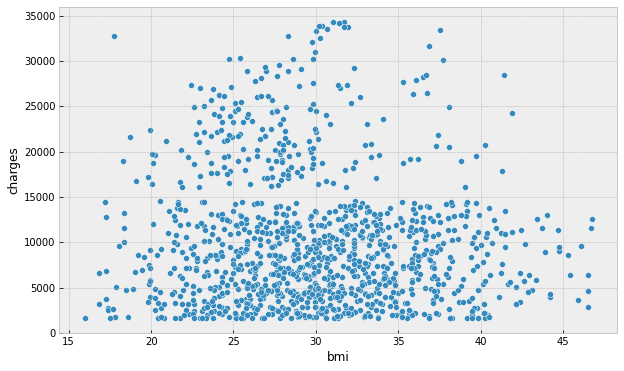

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["bmi"], df["charges"])
plt.show()

Bu grafige gore bmi-charges arasında pek bir iliski oldugu soylenemez

Mean Smoker-Bmi:

 smoker         no        yes
bmi     30.501815  25.914808 

 Mean Region-Bmi:

 region  southeast  southwest  northwest  northeast
bmi     32.246773  30.314815  28.833612  28.642828 


Count Smoker-Bmi:

          bmi
smoker      
no      1011
yes      130 

 Count Region-Bmi:

            bmi
region        
northwest  299
northeast  290
southeast  282
southwest  270 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


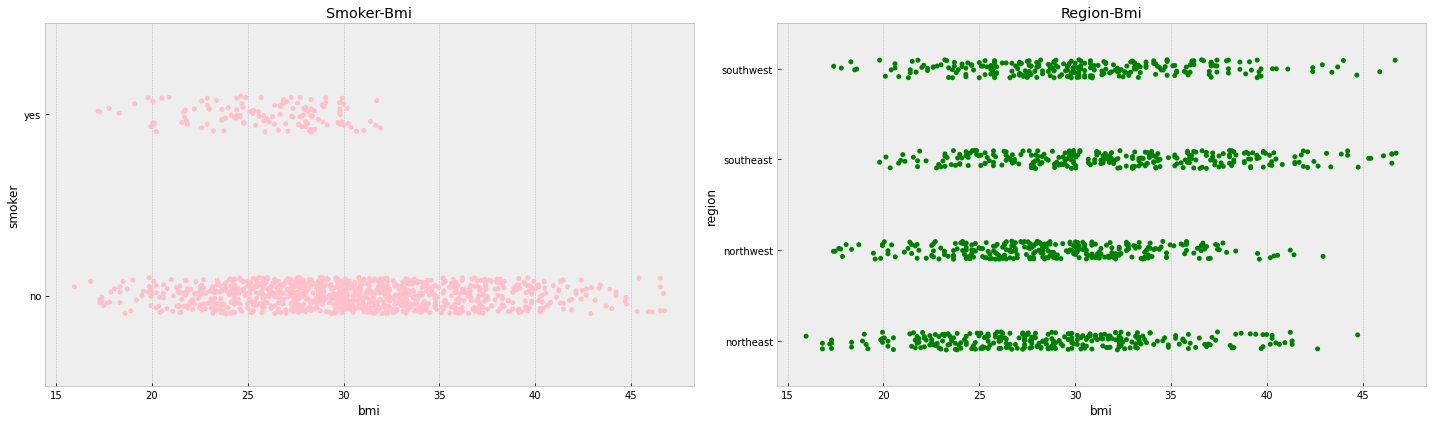

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


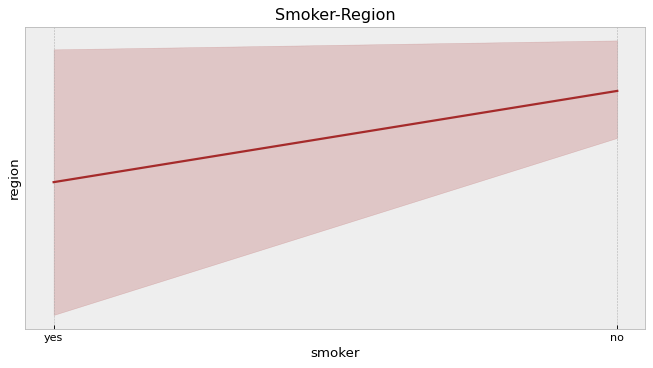

In [ ]:
print("Mean Smoker-Bmi:\n\n",df.groupby("smoker").agg({"bmi":"mean"}).sort_values("bmi",ascending=False).T,"\n\n",
      "Mean Region-Bmi:\n\n",df.groupby("region").agg({"bmi":"mean"}).sort_values("bmi",ascending=False).T,"\n\n")
print("Count Smoker-Bmi:\n\n",df.groupby(["smoker"]).agg({"bmi":"count"}),"\n\n",
      "Count Region-Bmi:\n\n",df.groupby(["region"]).agg({"bmi":"count"}).sort_values("bmi", ascending=False),"\n\n")
fig,axes = plt.subplots(nrows=1, ncols = 2, sharex = True, figsize=(20,6))  
sns.stripplot(df["bmi"], df["smoker"], ax = axes[0], color = "pink")
axes[0].set_title("Smoker-Bmi")
sns.stripplot(df["bmi"], df["region"], ax = axes[1], color = "green")
axes[1].set_title("Region-Bmi")
fig.tight_layout()
plt.show()   
plt.figure(figsize=(10,5), dpi = 80)
sns.lineplot(df["smoker"], df["region"], color = "brown")
plt.title("Smoker-Region")
plt.show()

## *Mean olarak sigara kullanmayan kişilerin vücut kitle indeksleri daha fazladır.* ##
##*Southeast region'daki kisilerin bmi'leri daha fazladır.* ##

## *Yukarıdaki sonuçlara göre bmi-smoker arasındaki iliskide sigara kullanmayan kisilerin vucut kitle indeksleri(bmi) daha yuksek* 

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), ['sex', 'smoker','region']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_df.head()

#df = pd.get_dummies(df)
#df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_male,onehotencoder__x1_yes,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges
0,0.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,1.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,1.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,1.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,1.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


Machine Learning algoritmaları categoric verilerle calisamayacagi icin OneHotEncoder ile categoric datalar numeric hale cevrilmis oldu.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = transformed_df
X = df.drop("charges", axis=1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train, y_train)

[[-0.98840235 -0.35964054 -0.60225971 ...  1.69550165  1.07338472
  -0.88321864]
 [ 1.01173373 -0.35964054 -0.60225971 ... -1.48764273  0.00313692
  -0.06265196]
 [-0.98840235  2.78055417 -0.60225971 ... -1.34616965 -0.54137511
  -0.06265196]
 ...
 [-0.98840235 -0.35964054 -0.60225971 ... -0.9217504  -0.2093764
  -0.88321864]
 [-0.98840235 -0.35964054 -0.60225971 ... -0.99248694  0.04922415
  -0.88321864]
 [-0.98840235 -0.35964054  1.66041324 ... -0.99248694  0.76357615
  -0.88321864]] 476     13887.20400
1134     1720.35370
228     17085.26760
668      2416.95500
304      3554.20300
           ...     
96       2404.73380
1147     3208.78700
106      3385.39915
1041     2632.99200
1122     3021.80915
Name: charges, Length: 943, dtype: float64


StandardScaler(Standardizasyon) ile verileri olcekleme yaparak veriyi aynı standard sapma ve ortalamaya sahip olması icin olceklendirdim. 

In [ ]:
print("X_train.shape: ",X_train.shape,"\nX_test.shape: ",X_test.shape,"\ny_train.shape: ",y_train.shape,"\ny_test.shape: ",y_test.shape)

X_train.shape:  (943, 8) 
X_test.shape:  (236, 8) 
y_train.shape:  (943,) 
y_test.shape:  (236,)


In [ ]:
y_train_reshape = np.array(y_train)
y_test_reshape = np.array(y_test)
print("y_train: ",y_train_reshape.shape,"\ny_test: ",y_test_reshape.shape)

y_train:  (943,) 
y_test:  (236,)


MSE: 23022500.186416425
MAE: 2700.123715698703
R2 Score: 0.5585355899926425



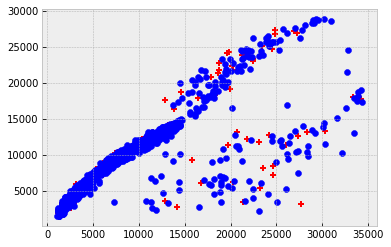

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
try:
    log_reg = LogisticRegression()
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    #kf = KFold(n_splits = 5)   # çapraz doğrulama
    #score = cross_val_score(kf, X_train, y_train, cv = 10, scoring = "accuracy")  # çapraz doğrulama
    #print("Cross Validation Scores are {}".format(score))
    #print("Average Cross Validation score : {}".format(score.mean()))
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2_Score = r2_score(y_test, y_pred)
    print("MSE: {}\nMAE: {}\nR2 Score: {}\n".format(mse,mae,r2_Score))
    y_true = lr.predict(X_train)
    plt.scatter(y_test, y_pred, color="red", marker = "+") # real-predict
    plt.scatter(y_train, y_true, color = "blue") # real-predict
    plt.show()

except Exception as e:
    print(e)


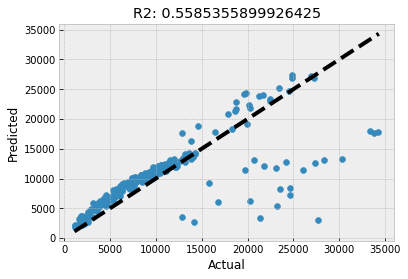

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()

Modele gore low r2 degerinin iyi sonuc verdigini gozlemleyebiliriz

[ 987   51  299 ...   26   85 1153]
LinearRegression Results: 
Model Score: 0.7003929662576321
MSE: 35865.52129396154
MAE: 117.66389526282663
R2 Score: 0.7003929662576321



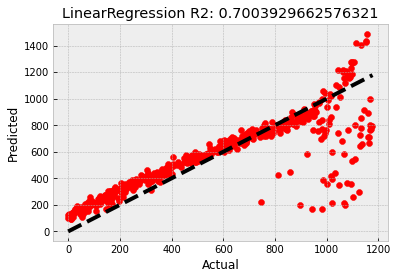

LogisticRegression Results: 
Model Score: 0.0
MSE: 84764.6377118644
MAE: 195.84110169491527
R2 Score: 0.29190819609322305



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


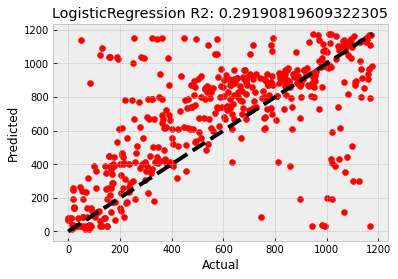

KNeighborsRegressor Results: 
Model Score: 0.35994340491396914
MSE: 76620.24203389829
MAE: 188.00084745762712
R2 Score: 0.35994340491396914



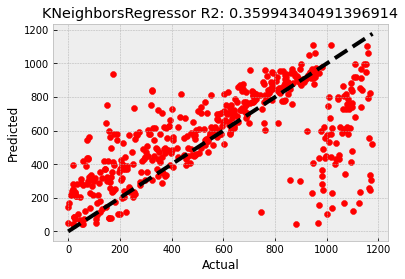

AdaBoostRegressor Results: 
Model Score: 0.611515310340792
MSE: 46504.93593328496
MAE: 159.57399367670175
R2 Score: 0.611515310340792



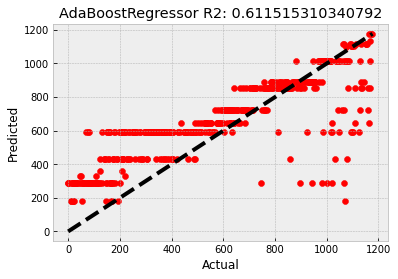

GradientBoostingRegressor Results: 
Model Score: 0.7228314673300205
MSE: 33179.44103755359
MAE: 95.81758778782448
R2 Score: 0.7228314673300205



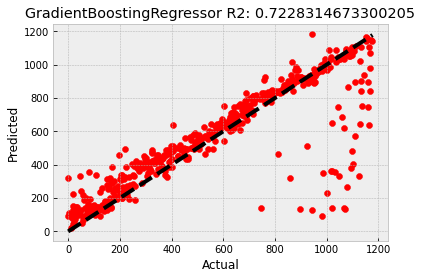

DecisionTreeRegressor Results: 
Model Score: 0.4654670085705337
MSE: 63988.16525423729
MAE: 118.41101694915254
R2 Score: 0.4654670085705337



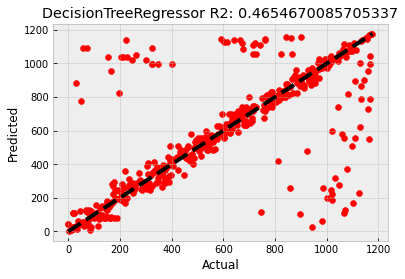

SVR Results: 
Model Score: 0.18569419149303623
MSE: 97479.36138213928
MAE: 262.90843876900686
R2 Score: 0.18569419149303623



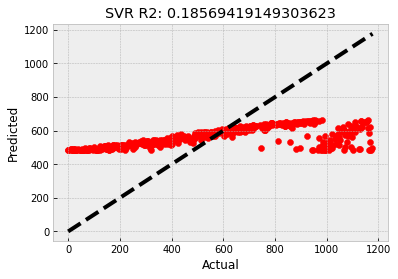

[12:56:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Results: 
Model Score: 0.7252557997040927
MSE: 32889.22774282602
MAE: 94.32757698075245
R2 Score: 0.7252557997040927



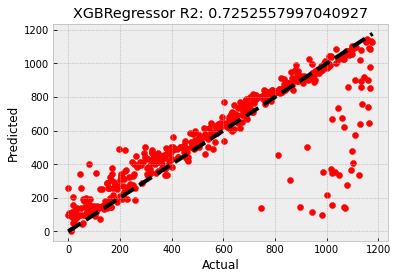

LGBMRegressor Results: 
Model Score: 0.6760628066371189
MSE: 38778.04923783271
MAE: 105.4408221321122
R2 Score: 0.6760628066371189



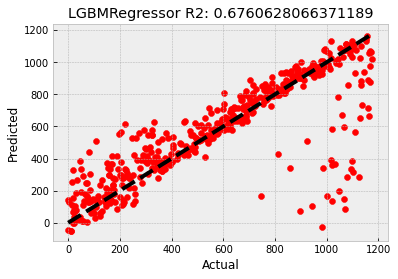

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y_transformed = labelEncoder.fit_transform(y)   # data continuous oldugundan dolayı encode ettim. 
print(y_transformed)

def modelCreateRegression(X,y, test_size, random_state):
  regressor = [
      ('LinearRegression',LinearRegression()),
      ("LogisticRegression",LogisticRegression()),
      ('KNeighborsRegressor',KNeighborsRegressor()),
      ('AdaBoostRegressor',AdaBoostRegressor()),
      ('GradientBoostingRegressor',GradientBoostingRegressor()),
      ('DecisionTreeRegressor',DecisionTreeRegressor()),
      ('SVR',SVR()),
      ('XGBRegressor',XGBRegressor()),
      ('LGBMRegressor',LGBMRegressor())
  ]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = random_state)
  for name, model in regressor:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test,y_pred)
      mae = mean_absolute_error(y_test,y_pred)
      r2_Score = r2_score(y_test, y_pred)
      print("{} Results: \nModel Score: {}\nMSE: {}\nMAE: {}\nR2 Score: {}\n".format(name,model.score(X_test,y_test),mse,mae,r2_Score))
      y_true = model.predict(X_train)
      fig, ax = plt.subplots()
      ax.scatter(y_test, y_pred, color = "red")
      ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
      ax.set_xlabel('Actual')
      ax.set_ylabel('Predicted')
      ax.set_title('{} R2: {}'.format(name, str(r2_score(y_test, y_pred))))
      plt.show()

modelCreateRegression(X,y_transformed, test_size = 0.4, random_state = 42) 

Model sonuclarına gore en iyi sonucu XGBoost Regressor vermiştir. Bu nedenle bir sonraki adımda GridSearchCV kullanarak parametre optimizasyonu yapıp daha iyi bir sonuc elde etmeye deneyecegim

In [ ]:
# Convert columns that are not numeric to a numeric value
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
'''
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(X_train[c].values))
        X_train[c] = lbl.transform(list(X_train[c].values))
        # x_train_full.drop(c,axis=1,inplace=True)

for c in X_test.columns:
    if X_test[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(X_test[c].values))
        X_test[c] = lbl.transform(list(X_test[c].values))
        # x_test.drop(c,axis=1,inplace=True)
'''
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
              }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.5483705623965093
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb = XGBRegressor(colsample_bytree = 0.7, learning_rate =  0.03, max_depth =  5, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = "reg:linear", silent = 1, subsample = 0.7)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print("MSE: {}\nMAE: {}\nR2 Score: {}".format(mse,mae,r2_score(y_test,y_pred)))

MSE: 23441434.456328183
MAE: 2736.2482542327775
R2 Score: 0.5505023803585483


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

gradientBoost = GradientBoostingRegressor()
parameters = {'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
           'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

gradientBoost_grid = GridSearchCV(gradientBoost,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

gradientBoost_grid.fit(X_train,y_train)

print(gradientBoost_grid.best_score_)
print(gradientBoost_grid.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
0.6106893475803873
{'learning_rate': 0.02, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gradientBoost = GradientBoostingRegressor(learning_rate = 0.02, max_depth = 4, max_features = 1, min_samples_leaf = 3, n_estimators = 100)
gradientBoost.fit(X_train, y_train)
y_pred = gradientBoost.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print("MSE: {}\nMAE: {}\nR2 Score: {}".format(mse,mae,r2_score(y_test,y_pred)))

MSE: 27124183.475625288
MAE: 3580.170792788633
R2 Score: 0.4798843931788406


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
